In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_images
from PIL import Image

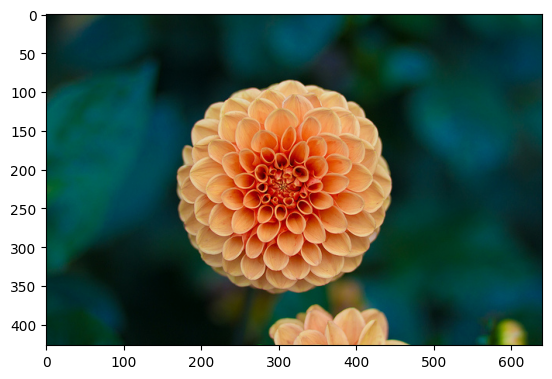

In [419]:
china, flower = load_sample_images()['images']
plt.imshow(flower)
plt.show()

In [521]:
def transform(image, matrix):
    max_x, max_y, vector_image = 0, 0, []
    for y, row in  enumerate(image):
        vector_image.append([])
        for x, rgb in enumerate(row):
            tx, ty = np.matmul(matrix,(x, y))
            vector_image[-1].append(((tx,ty),tuple(rgb)))
            abs_tx, abs_ty = abs(tx), abs(ty)
            if abs_tx > max_x: max_x = abs_tx
            if abs_ty > max_y: max_y = abs_ty
    transformed_image = np.zeros((max_y + 1, max_x + 1, 3), np.uint8)
    for row in vector_image:
        for (x, y), rgb in row:
            transformed_image[y, x] = rgb
    scale = int(np.sqrt(abs(np.linalg.det(matrix))))
    if np.linalg.det(matrix) != 1:
        transformed_image = np.asarray(Image.fromarray(transformed_image).reduce(scale)) * scale ** 2
    return transformed_image

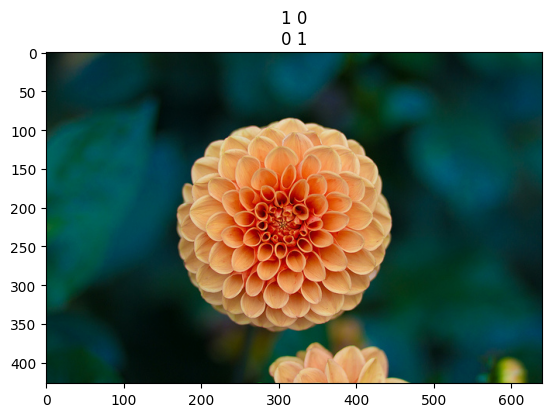

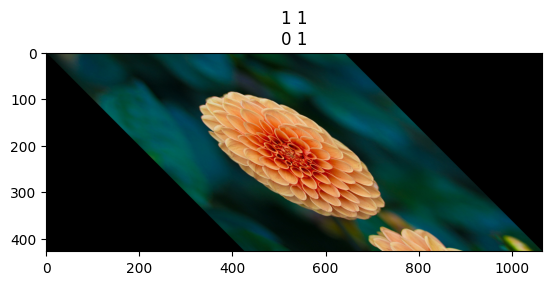

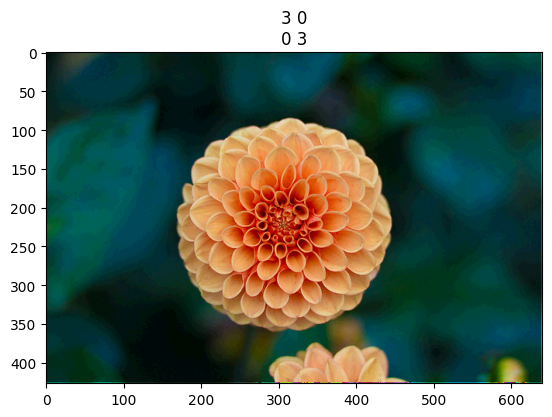

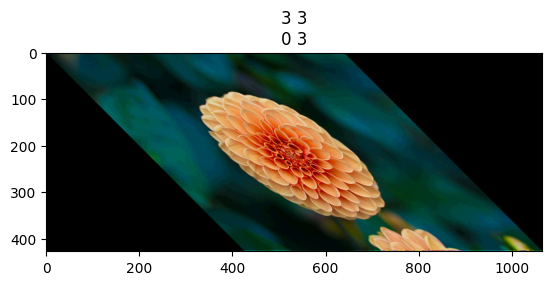

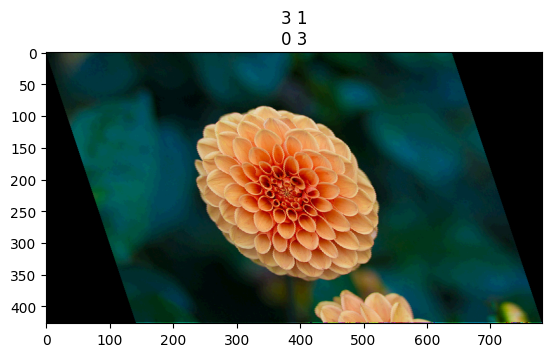

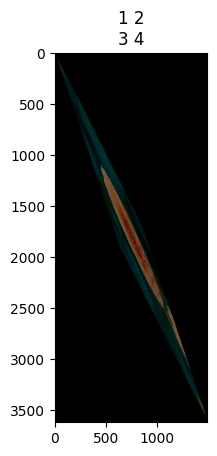

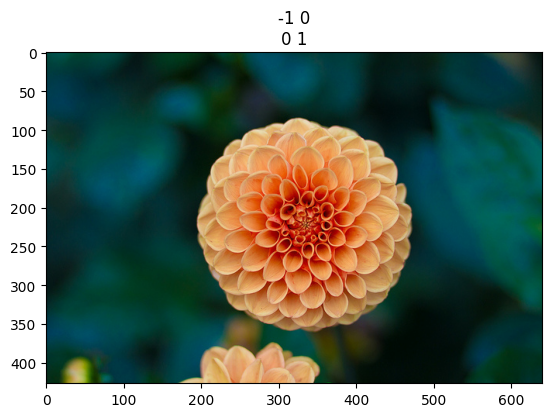

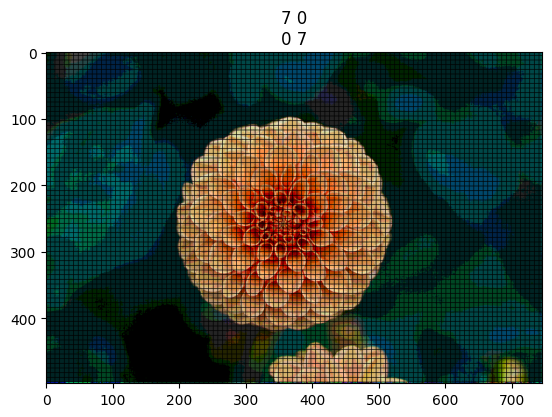

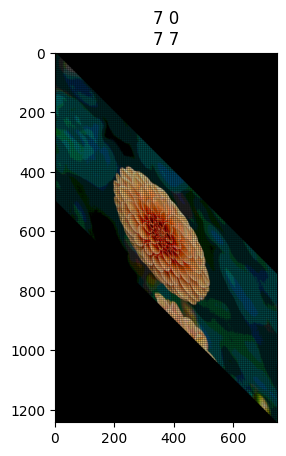

In [523]:
transformations = ([[1,0],[0,1]],[[1,1],[0,1]],[[3,0],[0,3]],[[3,3],[0,3]],[[3,1],[0,3]],[[1,2],[3,4]],[[-1,0],[0,1]],[[7,0],[0,7]],[[7,0],[7,7]])
for transformation in transformations:
    transformed_image = transform(flower, transformation)
    plt.imshow(transformed_image)
    plt.title(f'{transformation}'.replace('], ', '\n').replace('[','').replace(']','').replace(',',''))
    plt.show()